In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_C = pd.read_csv('C-train.csv')
df_C

,x1,x2,x3,x4,x5,y
0,-146,-128,106,275,259,A
1,-61,108,-69,-178,-126,B
2,-155,4,-187,-197,-9,B
3,51,-23,25,44,14,A
4,177,-110,2,84,50,C
...,...,...,...,...,...,...
185,-126,-64,-126,-62,82,B
186,177,-3,72,59,-48,C
187,70,-67,139,218,103,C
188,-61,-34,-185,-172,-6,B


In [3]:
df_C.describe()

,x1,x2,x3,x4,x5
count,190.000000,190.000000,190.000000,190.000000,190.000000
mean,-6.452632,-5.700000,11.547368,20.215789,14.226316
std,130.882052,133.658926,132.262707,168.766552,143.927437
min,-346.000000,-480.000000,-310.000000,-415.000000,-409.000000
25%,-113.500000,-95.500000,-96.500000,-116.500000,-94.500000
50%,14.500000,-30.500000,6.000000,44.500000,26.500000
75%,103.250000,80.250000,114.750000,133.500000,111.250000
max,243.000000,440.000000,326.000000,426.000000,372.000000


In [4]:
df_C.drop_duplicates(inplace=True)
df_C.dropna(inplace=True)

In [5]:
df_C.describe()

,x1,x2,x3,x4,x5
count,190.000000,190.000000,190.000000,190.000000,190.000000
mean,-6.452632,-5.700000,11.547368,20.215789,14.226316
std,130.882052,133.658926,132.262707,168.766552,143.927437
min,-346.000000,-480.000000,-310.000000,-415.000000,-409.000000
25%,-113.500000,-95.500000,-96.500000,-116.500000,-94.500000
50%,14.500000,-30.500000,6.000000,44.500000,26.500000
75%,103.250000,80.250000,114.750000,133.500000,111.250000
max,243.000000,440.000000,326.000000,426.000000,372.000000


In [6]:
Y = df_C['y']
df_C.drop(columns='y',inplace=True)
Y

0      A
1      B
2      B
3      A
4      C
      ..
185    B
186    C
187    C
188    B
189    A
Name: y, Length: 190, dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x14baf74fd30>,
 'caps': [<matplotlib.lines.Line2D at 0x14baf76d2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14baf74fa90>,
 'medians': [<matplotlib.lines.Line2D at 0x14baf76d7f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x14baf76da90>,
 'means': []}

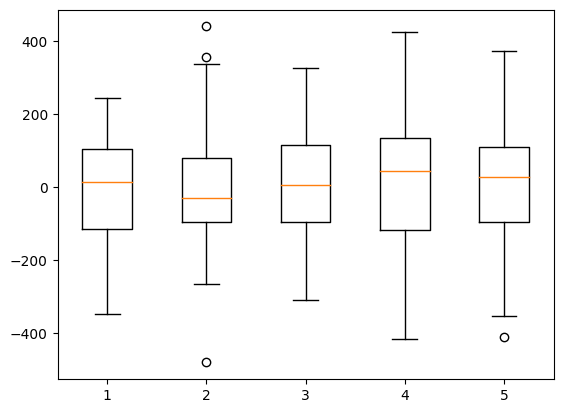

In [7]:
fig,ax = plt.subplots()
ax.boxplot(df_C)


In [8]:
columns_cont = []
for i in df_C.columns:
    columns_cont.append(i)
    

In [9]:
df_x_test = pd.read_csv('C-test.csv')
df_x_test.drop(columns = 'y',inplace = True)
df_C = df_C.append(df_x_test)

In [10]:
df_C

,x1,x2,x3,x4,x5
0,-146,-128,106,275,259
1,-61,108,-69,-178,-126
2,-155,4,-187,-197,-9
3,51,-23,25,44,14
4,177,-110,2,84,50
...,...,...,...,...,...
5,-121,34,168,181,82
6,145,-26,28,36,-24
7,-156,-37,-167,-132,49
8,-57,-166,65,252,247


In [11]:
scale = preprocessing.StandardScaler()
df_C = pd.DataFrame(scale.fit_transform(df_C),columns = columns_cont)

In [12]:
df_C

,x1,x2,x3,x4,x5
0,-1.080740,-0.888642,0.704479,1.458587,1.662694
1,-0.425840,0.894081,-0.626664,-1.204720,-1.016994
2,-1.150083,0.108474,-1.524235,-1.316427,-0.202647
3,0.437088,-0.095481,0.088350,0.100477,-0.042562
4,1.407882,-0.752671,-0.086600,0.335647,0.208006
...,...,...,...,...,...
195,-0.888122,0.335091,1.176084,0.905936,0.430734
196,1.161332,-0.118143,0.111169,0.053443,-0.307051
197,-1.157787,-0.201236,-1.372105,-0.934274,0.201046
198,-0.395021,-1.175690,0.392611,1.323364,1.579172


In [13]:
df_use_predict = df_C.tail(10)
df_C.drop(df_C.tail(10).index,inplace=True)
df_use_predict

,x1,x2,x3,x4,x5
190,0.244471,-0.352314,-0.033355,0.218062,0.277609
191,0.729868,-1.054828,0.925069,1.564414,1.182439
192,0.568069,-0.843318,1.465133,1.905411,1.210280
193,1.030351,-1.024612,-0.930926,-0.175849,0.340251
194,0.922485,-1.213460,1.145658,1.858377,1.349484
195,-0.888122,0.335091,1.176084,0.905936,0.430734
196,1.161332,-0.118143,0.111169,0.053443,-0.307051
197,-1.157787,-0.201236,-1.372105,-0.934274,0.201046
198,-0.395021,-1.175690,0.392611,1.323364,1.579172
199,-1.157787,-1.039720,-0.223518,0.758955,1.523490


In [14]:
df_C

,x1,x2,x3,x4,x5
0,-1.080740,-0.888642,0.704479,1.458587,1.662694
1,-0.425840,0.894081,-0.626664,-1.204720,-1.016994
2,-1.150083,0.108474,-1.524235,-1.316427,-0.202647
3,0.437088,-0.095481,0.088350,0.100477,-0.042562
4,1.407882,-0.752671,-0.086600,0.335647,0.208006
...,...,...,...,...,...
185,-0.926646,-0.405192,-1.060237,-0.522726,0.430734
186,1.407882,0.055597,0.445857,0.188666,-0.474096
187,0.583478,-0.427853,0.955495,1.123469,0.576899
188,-0.425840,-0.178574,-1.509022,-1.169445,-0.181766


In [15]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(df_C, Y, test_size=0.3, random_state=42)

In [16]:
# Create Model List
classification = { 'KNN': KNeighborsClassifier(), 'DT': DecisionTreeClassifier(), 'RF': RandomForestClassifier(),'SVC' : SVC() }
# Create Parameter Dictionary for KNN
K_list = [1, 3, 5, 7, 9 , 11, 13, 15, 17, 19, 21, 23, 25, 35, 45]
KNN_param = dict(n_neighbors=K_list)
# Create Parameter Dictionary for Decision Tree
ASM_function = ['entropy', 'gini']
maxD = [ 4, 5, 6, None]
maxF = ['auto', 'log2', None]
minSample = [1,2, 4]
DT_param= dict(criterion=ASM_function, max_depth = maxD, min_samples_leaf = minSample, max_features = maxF)
nEst = [10, 30, 50, 100]
RF_param = dict(n_estimators= nEst, criterion=ASM_function, max_depth = maxD, min_samples_leaf = minSample,max_features = maxF)
kernel = ['rbf','poly']
C_list = [0.1, 1.0, 10.0, 100.0, 200.0, 500.0]
Gamma_list = [0.01, 0.1, 1.0, 10]
d_list = [2, 3]
SVC_params = dict(kernel = kernel,C = C_list,gamma = Gamma_list,degree = d_list)

In [17]:
grid_KNN = GridSearchCV( estimator = classification['KNN'],n_jobs = 1,verbose = 10,scoring = 'accuracy', cv = 2,param_grid = KNN_param )
grid_result_KNN = grid_KNN.fit(X_train,Y_train)

Fitting 2 folds for each of 15 candidates, totalling 30 fits
[CV 1/2; 1/15] START n_neighbors=1..............................................
[CV 1/2; 1/15] END ...............n_neighbors=1;, score=0.761 total time=   0.0s
[CV 2/2; 1/15] START n_neighbors=1..............................................
[CV 2/2; 1/15] END ...............n_neighbors=1;, score=0.773 total time=   0.0s
[CV 1/2; 2/15] START n_neighbors=3..............................................
[CV 1/2; 2/15] END ...............n_neighbors=3;, score=0.821 total time=   0.0s
[CV 2/2; 2/15] START n_neighbors=3..............................................
[CV 2/2; 2/15] END ...............n_neighbors=3;, score=0.848 total time=   0.0s
[CV 1/2; 3/15] START n_neighbors=5..............................................
[CV 1/2; 3/15] END ...............n_neighbors=5;, score=0.776 total time=   0.0s
[CV 2/2; 3/15] START n_neighbors=5..............................................
[CV 2/2; 3/15] END ...............n_neighbors=5;

In [18]:
grid_DT = GridSearchCV( estimator = classification['DT'],n_jobs = 1,verbose = 10,scoring = 'accuracy', cv = 2,param_grid = DT_param )
grid_result_DT = grid_DT.fit(X_train,Y_train)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
[CV 1/2; 1/72] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1
[CV 1/2; 1/72] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1;, score=0.701 total time=   0.0s
[CV 2/2; 1/72] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1
[CV 2/2; 1/72] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1;, score=0.652 total time=   0.0s
[CV 1/2; 2/72] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2
[CV 1/2; 2/72] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2;, score=0.746 total time=   0.0s
[CV 2/2; 2/72] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2
[CV 2/2; 2/72] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2;, score=0.818 total time=   0.0s
[CV 1/2; 3/72] START criterion=entropy, max_depth=4, max_features=auto, min_samples_le

In [19]:
grid_RF = GridSearchCV( estimator = classification['RF'],n_jobs = 1,verbose = 10,scoring = 'accuracy', cv = 2,param_grid = RF_param )
grid_result_RF = grid_RF.fit(X_train,Y_train)

Fitting 2 folds for each of 288 candidates, totalling 576 fits
[CV 1/2; 1/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 1/2; 1/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.836 total time=   0.0s
[CV 2/2; 1/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 2/2; 1/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.803 total time=   0.0s
[CV 1/2; 2/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=30
[CV 1/2; 2/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.806 total time=   0.0s
[CV 2/2; 2/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=30
[CV 2/2; 2/288] END criterion=entropy, max_depth=4, max_features=auto, min_sample

In [20]:
grid_SVC = GridSearchCV( estimator=  classification['SVC'], n_jobs = 1, verbose = 10, scoring = 'accuracy', cv = 2, param_grid = SVC_params)
grid_result_SVC = grid_SVC.fit(X_train, Y_train)

Fitting 2 folds for each of 96 candidates, totalling 192 fits
[CV 1/2; 1/96] START C=0.1, degree=2, gamma=0.01, kernel=rbf....................
[CV 1/2; 1/96] END C=0.1, degree=2, gamma=0.01, kernel=rbf;, score=0.537 total time=   0.0s
[CV 2/2; 1/96] START C=0.1, degree=2, gamma=0.01, kernel=rbf....................
[CV 2/2; 1/96] END C=0.1, degree=2, gamma=0.01, kernel=rbf;, score=0.348 total time=   0.0s
[CV 1/2; 2/96] START C=0.1, degree=2, gamma=0.01, kernel=poly...................
[CV 1/2; 2/96] END C=0.1, degree=2, gamma=0.01, kernel=poly;, score=0.433 total time=   0.0s
[CV 2/2; 2/96] START C=0.1, degree=2, gamma=0.01, kernel=poly...................
[CV 2/2; 2/96] END C=0.1, degree=2, gamma=0.01, kernel=poly;, score=0.348 total time=   0.0s
[CV 1/2; 3/96] START C=0.1, degree=2, gamma=0.1, kernel=rbf.....................
[CV 1/2; 3/96] END C=0.1, degree=2, gamma=0.1, kernel=rbf;, score=0.537 total time=   0.0s
[CV 2/2; 3/96] START C=0.1, degree=2, gamma=0.1, kernel=rbf.............

In [21]:
print('Best params: ',grid_result_KNN.best_params_)
print('Best score: ', grid_result_KNN.best_score_)
print('Best params: ',grid_result_DT.best_params_)
print('Best score: ', grid_result_DT.best_score_)
print('Best params: ',grid_result_RF.best_params_)
print('Best score: ', grid_result_RF.best_score_)
print('Best params: ',grid_result_SVC.best_params_)
print('Best score: ', grid_result_SVC.best_score_)

Best params:  {'n_neighbors': 7}
Best score:  0.8348032564450475
Best params:  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2}
Best score:  0.7822252374491181
Best params:  {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 10}
Best score:  0.8648801447308909
Best params:  {'C': 10.0, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
Best score:  0.8422659430122117


In [22]:
RandomF = RandomForestClassifier(criterion=grid_result_RF.best_params_['criterion'],
max_depth = grid_result_RF.best_params_['max_depth'], 
max_features = grid_result_RF.best_params_['max_features'],
min_samples_leaf = grid_result_RF.best_params_['min_samples_leaf'],
 n_estimators = grid_result_RF.best_params_['n_estimators'])
RandomF.fit(X_train,Y_train)
y_pred= RandomF.predict(df_use_predict)
print(y_pred)

['A' 'B' 'C' 'A' 'B' 'A' 'C' 'B' 'A' 'A']
